In [57]:
import os
import matplotlib.pyplot as plt
from datafilereader import DataFileReader
import numpy as np
import pandas as pd
from datafileviewer_template import DataFileViewer


## Step 1: Loading and Visualizing Data for Each Group and Coin

We will first start by taking a look at the data structure. Using pandas is a good way to familiarize ourselves with it.


In [58]:
def load_data_to_dataframe(file_path):
    reader = DataFileReader(file_path)
    
    # Load metadata
    metadata_list = []
    for i in range(reader._DataFileReader__get_N_mes()):
        metadata = reader._DataFileReader__get_metadata(i)
        metadata_list.append(metadata)
    metadata_df = pd.DataFrame(metadata_list)
    
    # Load impedance and frequency data
    frequency, Z = reader.get_all_mesurements()
    impedance_df = pd.DataFrame(Z, columns=[f"Freq_{i}" for i in range(Z.shape[1])])
    frequency_df = pd.DataFrame(frequency, columns=["Frequency"])
    
    return metadata_df, impedance_df, frequency_df

# Example usage
file_path = "./data/Groupe4/1_CHF.h5"  # Example file path
metadata_df, impedance_df, frequency_df = load_data_to_dataframe(file_path)

print("Metadata DataFrame:")
print(metadata_df.head())

Metadata DataFrame:
  Measurement description  Measurement UID               Date and time  \
0                  data 1                0  2024-05-16 17:37:04.159201   
1                  data 2                1  2024-05-16 17:37:08.235883   
2                  data 3                2  2024-05-16 17:37:09.655036   
3                  data 4                3  2024-05-16 17:37:10.898032   
4                  data 5                4  2024-05-16 17:37:12.188741   

  Software version  Reference  Number of points  Number of sequences  \
0              1.0          1               508                   10   
1              1.0          0               508                   10   
2              1.0          0               508                   10   
3              1.0          0               508                   10   
4              1.0          0               508                   10   

   Shunt resistor [Ohm]  Reference voltage [V]  Sampling frequency [Hz]  \
0                   100    

In [59]:
print("\nImpedance DataFrame:")
print(impedance_df.head())


Impedance DataFrame:
                 Freq_0                Freq_1                Freq_2  \
0  15.731732+ 9.108269j  15.690198+18.232568j  15.636502+27.379986j   
1  15.931489+ 9.097130j  16.516648+18.058323j  17.395112+26.783161j   
2  15.956409+ 9.085651j  16.545704+18.032177j  17.427472+26.737977j   
3  15.717805+ 9.191454j  16.386587+18.204579j  17.359282+26.922546j   
4  15.771835+ 9.160014j  16.408929+18.158460j  17.347073+26.884264j   

                 Freq_3                Freq_4                Freq_5  \
0  15.582616+36.548360j  15.535055+45.731398j  15.495699+54.922882j   
1  18.458546+35.224167j  19.605766+43.382298j  20.759822+51.289862j   
2  18.490513+35.156793j  19.632405+43.292079j  20.776640+51.178518j   
3  18.493070+35.310674j  19.672181+43.396213j  20.823255+51.234809j   
4  18.456536+35.296742j  19.626174+43.412499j  20.780274+51.278523j   

                 Freq_6                Freq_7                Freq_8  \
0  15.463901+64.118229j  15.438018+73.314522j  15.416

In [60]:
print("\nFrequency DataFrame:")
print(frequency_df.head())


Frequency DataFrame:
      Frequency
0   2755.905512
1   5511.811024
2   8267.716535
3  11023.622047
4  13779.527559


In [61]:
# Function to separate resistance (real part) and reactance (imaginary part)
def separate_resistance_reactance(df):
    resistance_df = df.map(lambda x: np.real(x))
    reactance_df = df.map(lambda x: np.imag(x))
    return resistance_df, reactance_df

# Separate the resistance and reactance parts of the impedance DataFrame
resistance_df, reactance_df = separate_resistance_reactance(impedance_df)

# print("Resistance DataFrame:")
# print(resistance_df.head())

# print("\nReactance DataFrame:")
# print(reactance_df.head())



In [62]:
# Check if frequency data is uniform
def check_frequency_uniformity(frequency_dfs):
    first_freq = frequency_dfs[0]
    for freq_df in frequency_dfs[1:]:
        if not first_freq.equals(freq_df):
            return False
    return True

# List to store frequency DataFrames for all files
frequency_dfs = [frequency_df]

# Assuming we have more files to check
# for file_path in other_file_paths:
#     _, _, freq_df = load_data_to_dataframe(file_path)
#     frequency_dfs.append(freq_df)

is_uniform = check_frequency_uniformity(frequency_dfs)
print(f"Frequency data uniform across measurements: {is_uniform}")


Frequency data uniform across measurements: True


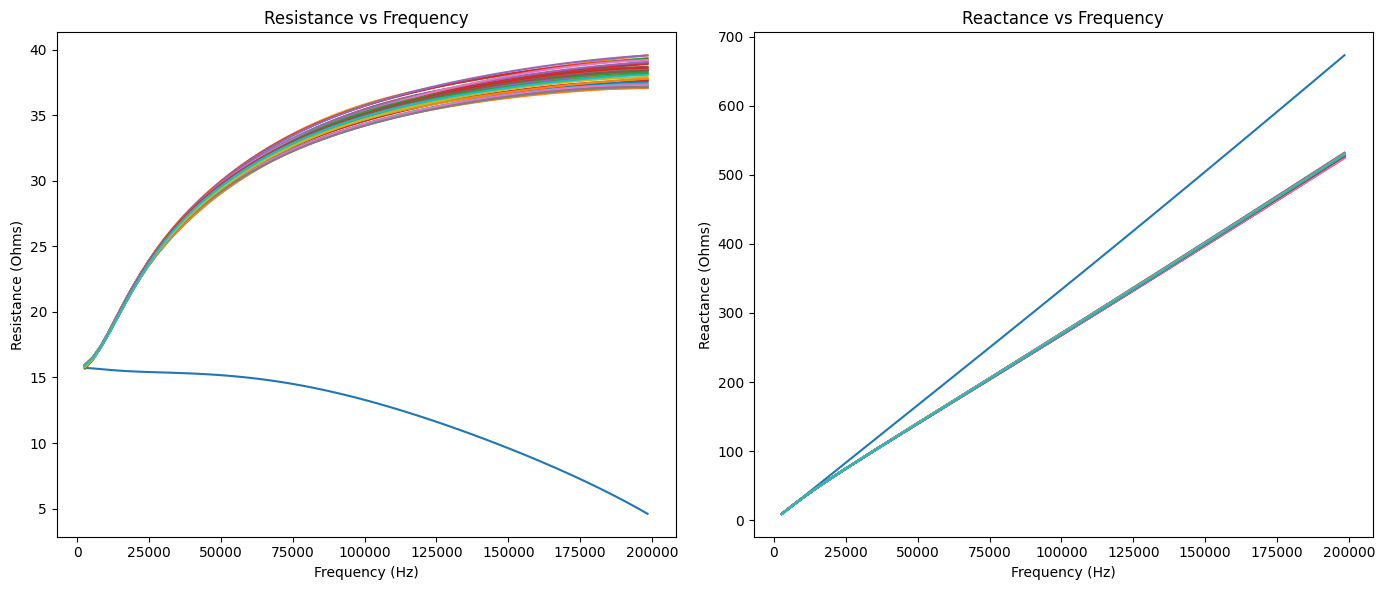

In [63]:
# Visualize the resistance and reactance parts of the impedance data
import matplotlib.pyplot as plt

def plot_impedance_parts(frequency, resistance_df, reactance_df):
    plt.figure(figsize=(14, 6))

    # Plot resistance part
    plt.subplot(1, 2, 1)
    for idx in range(resistance_df.shape[0]):
        plt.plot(frequency, resistance_df.iloc[idx])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Resistance (Ohms)')
    plt.title('Resistance vs Frequency')
    #plt.legend()

    # Plot reactance part
    plt.subplot(1, 2, 2)
    for idx in range(reactance_df.shape[0]):
        plt.plot(frequency, reactance_df.iloc[idx])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Reactance (Ohms)')
    plt.title('Reactance vs Frequency')
    #plt.legend()

    plt.tight_layout()
    plt.show()

# Use the first frequency DataFrame
frequency = frequency_dfs[0]['Frequency']
plot_impedance_parts(frequency, resistance_df, reactance_df)



In this step, we will load the impedance data from all groups for each coin, plot the data, and look for any anomalies.

File not found: ./data\Groupe1\1_CHF.h5
File not found: ./data\Groupe2\1_CHF.h5
File not found: ./data\Groupe3\1_CHF.h5
File not found: ./data\Groupe5\1_CHF.h5
File not found: ./data\Groupe6\1_CHF.h5
File not found: ./data\Groupe7\1_CHF.h5
File not found: ./data\Groupe9\1_CHF.h5


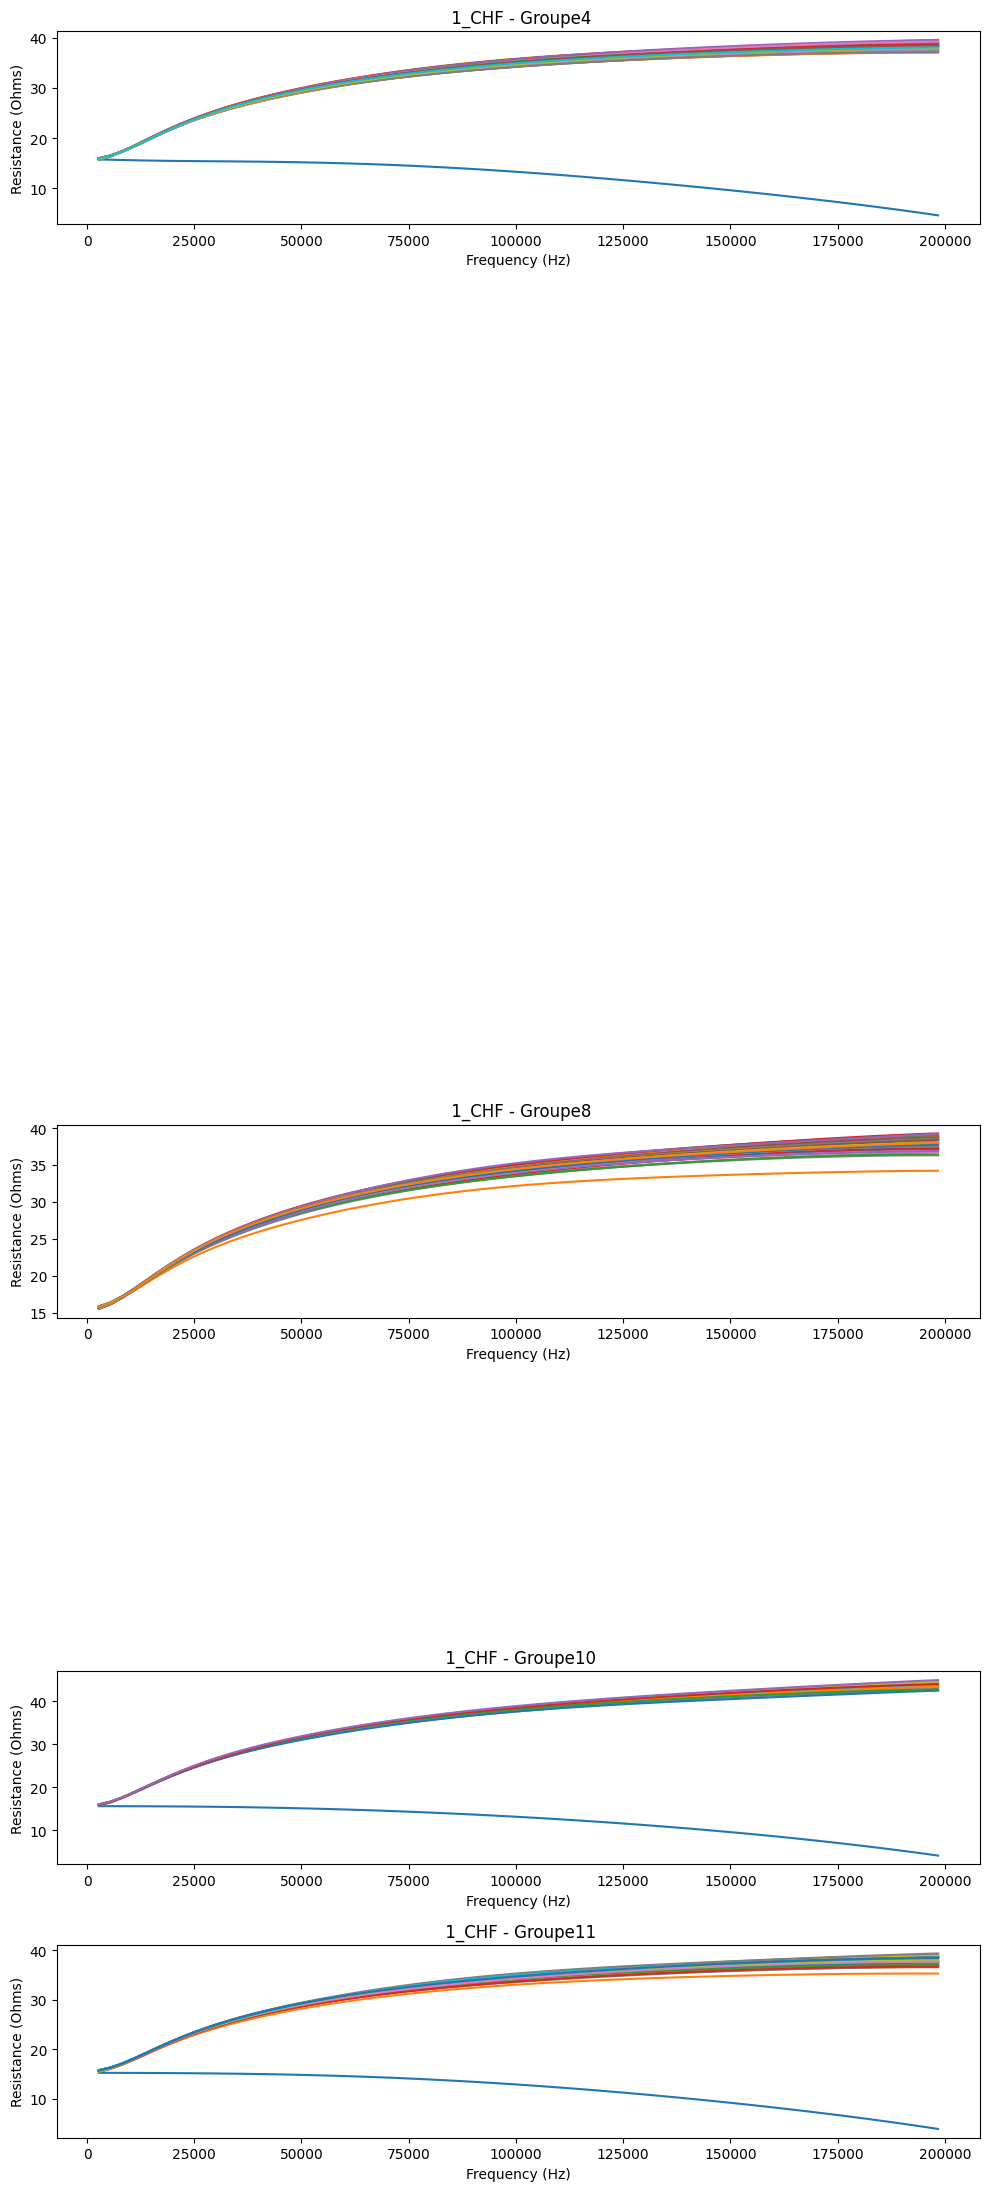

File not found: ./data\Groupe1\1_CHF.h5
File not found: ./data\Groupe2\1_CHF.h5
File not found: ./data\Groupe3\1_CHF.h5
File not found: ./data\Groupe5\1_CHF.h5
File not found: ./data\Groupe6\1_CHF.h5
File not found: ./data\Groupe7\1_CHF.h5
File not found: ./data\Groupe9\1_CHF.h5


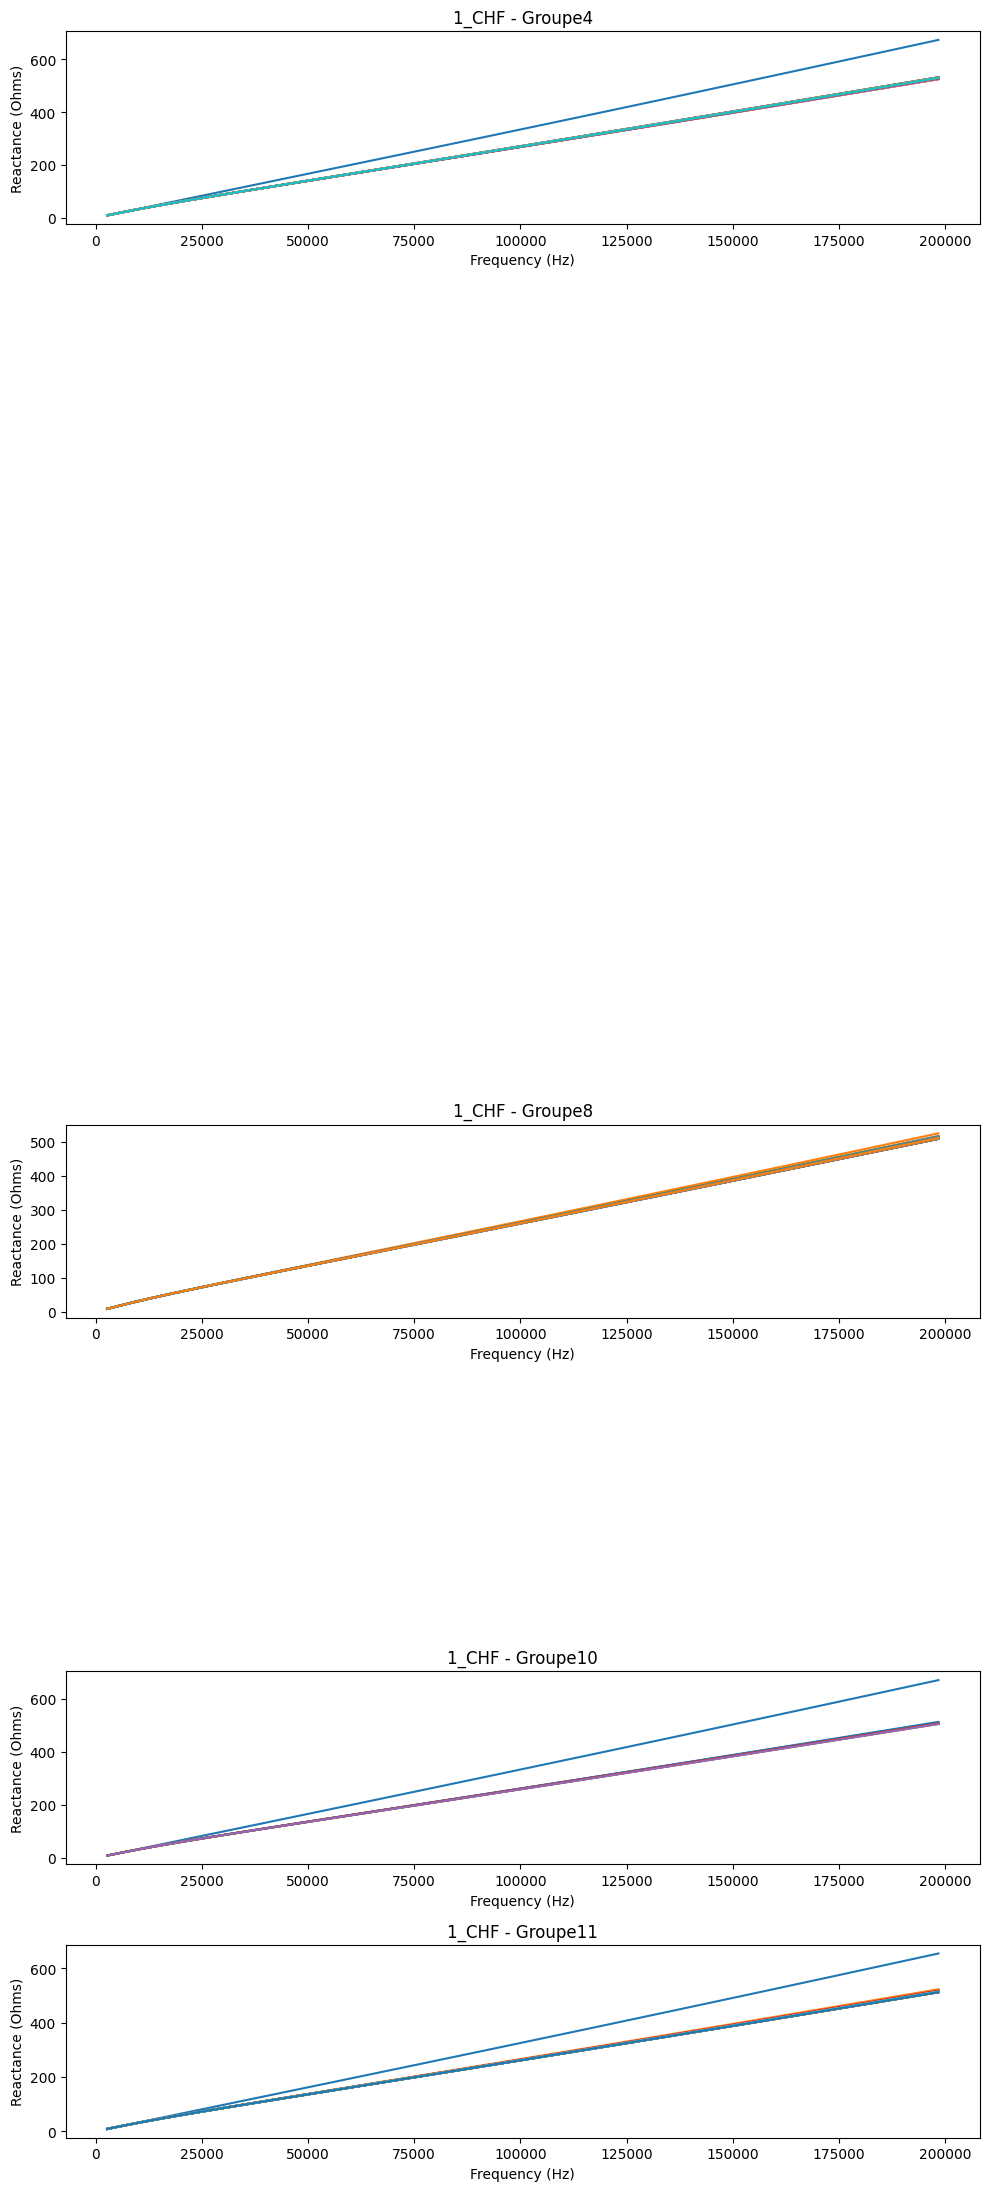

File not found: ./data\Groupe1\2_CHF.h5
File not found: ./data\Groupe2\2_CHF.h5
File not found: ./data\Groupe3\2_CHF.h5
File not found: ./data\Groupe5\2_CHF.h5
File not found: ./data\Groupe6\2_CHF.h5
File not found: ./data\Groupe7\2_CHF.h5
File not found: ./data\Groupe9\2_CHF.h5


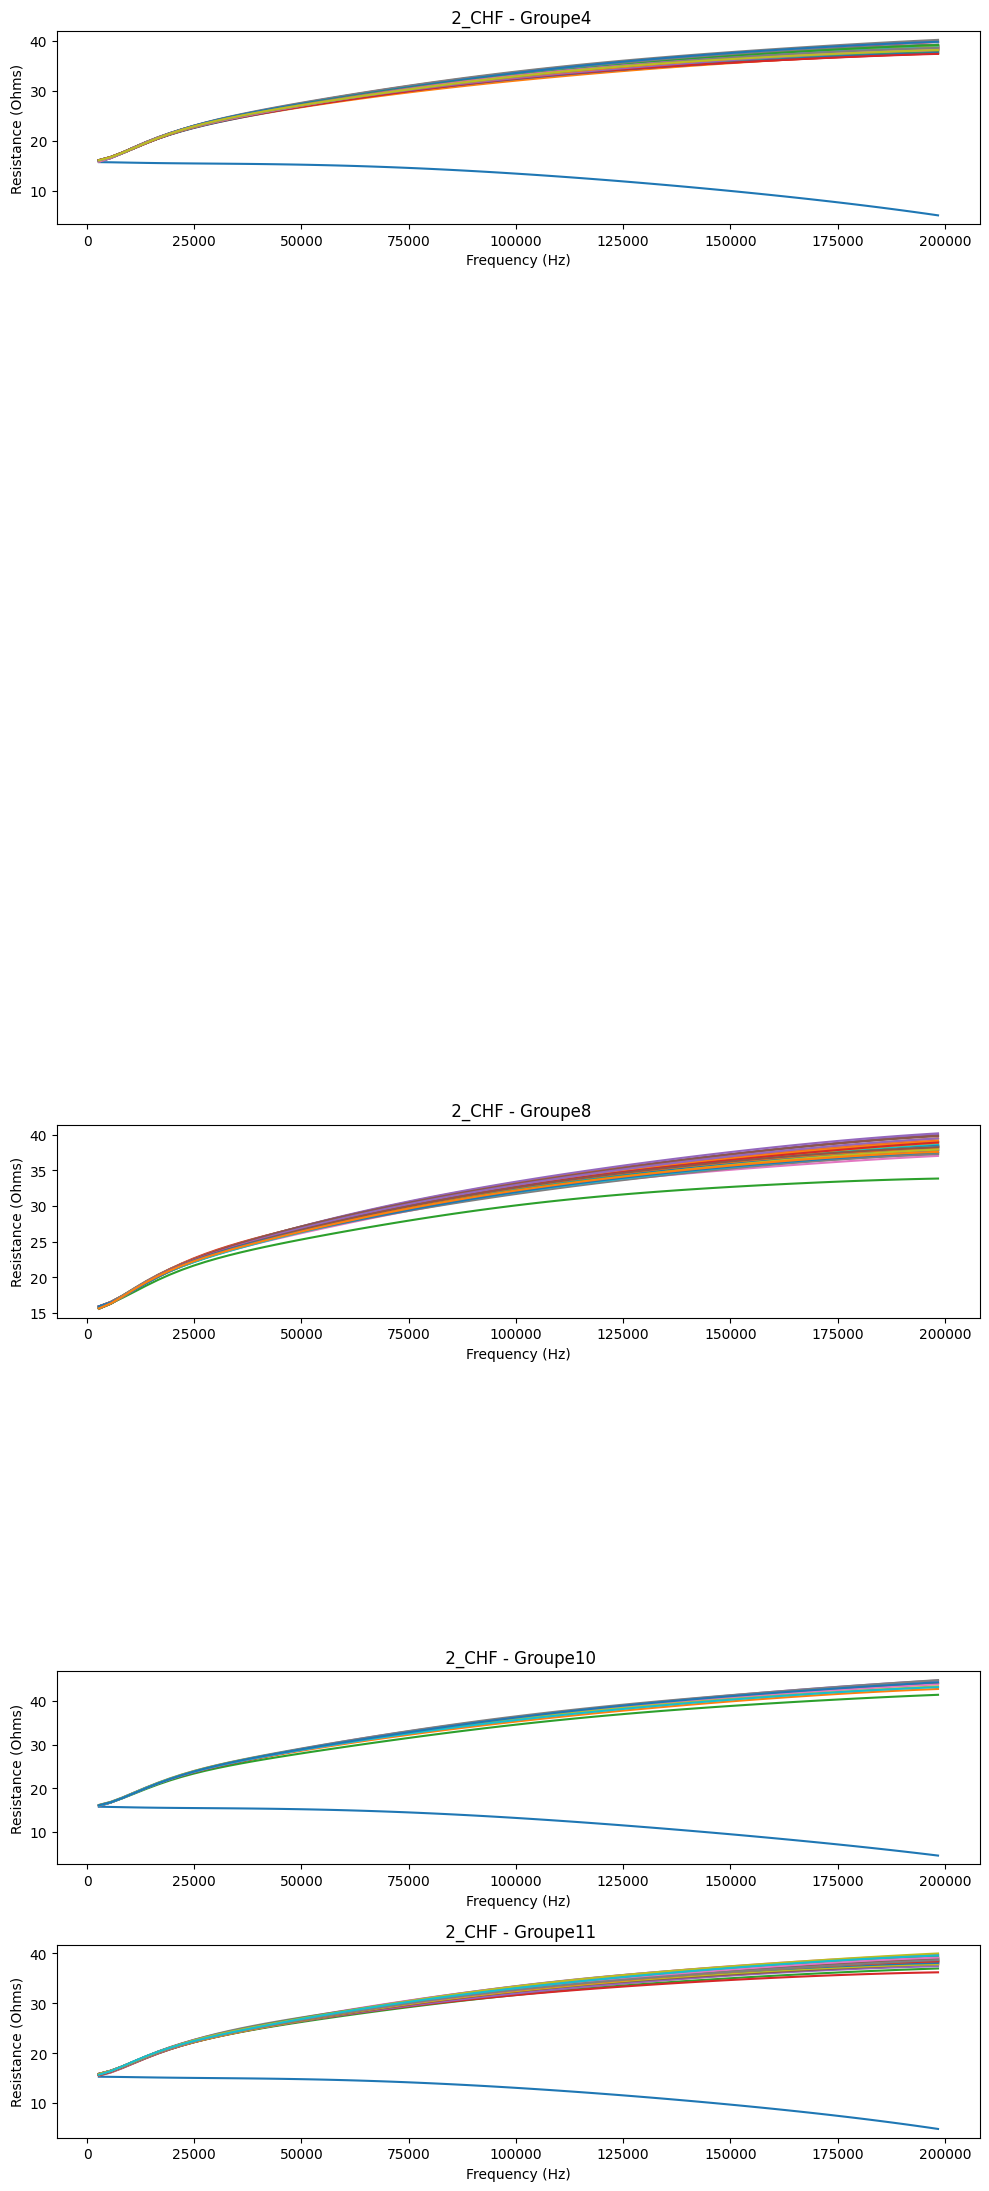

File not found: ./data\Groupe1\2_CHF.h5
File not found: ./data\Groupe2\2_CHF.h5
File not found: ./data\Groupe3\2_CHF.h5
File not found: ./data\Groupe5\2_CHF.h5
File not found: ./data\Groupe6\2_CHF.h5
File not found: ./data\Groupe7\2_CHF.h5
File not found: ./data\Groupe9\2_CHF.h5


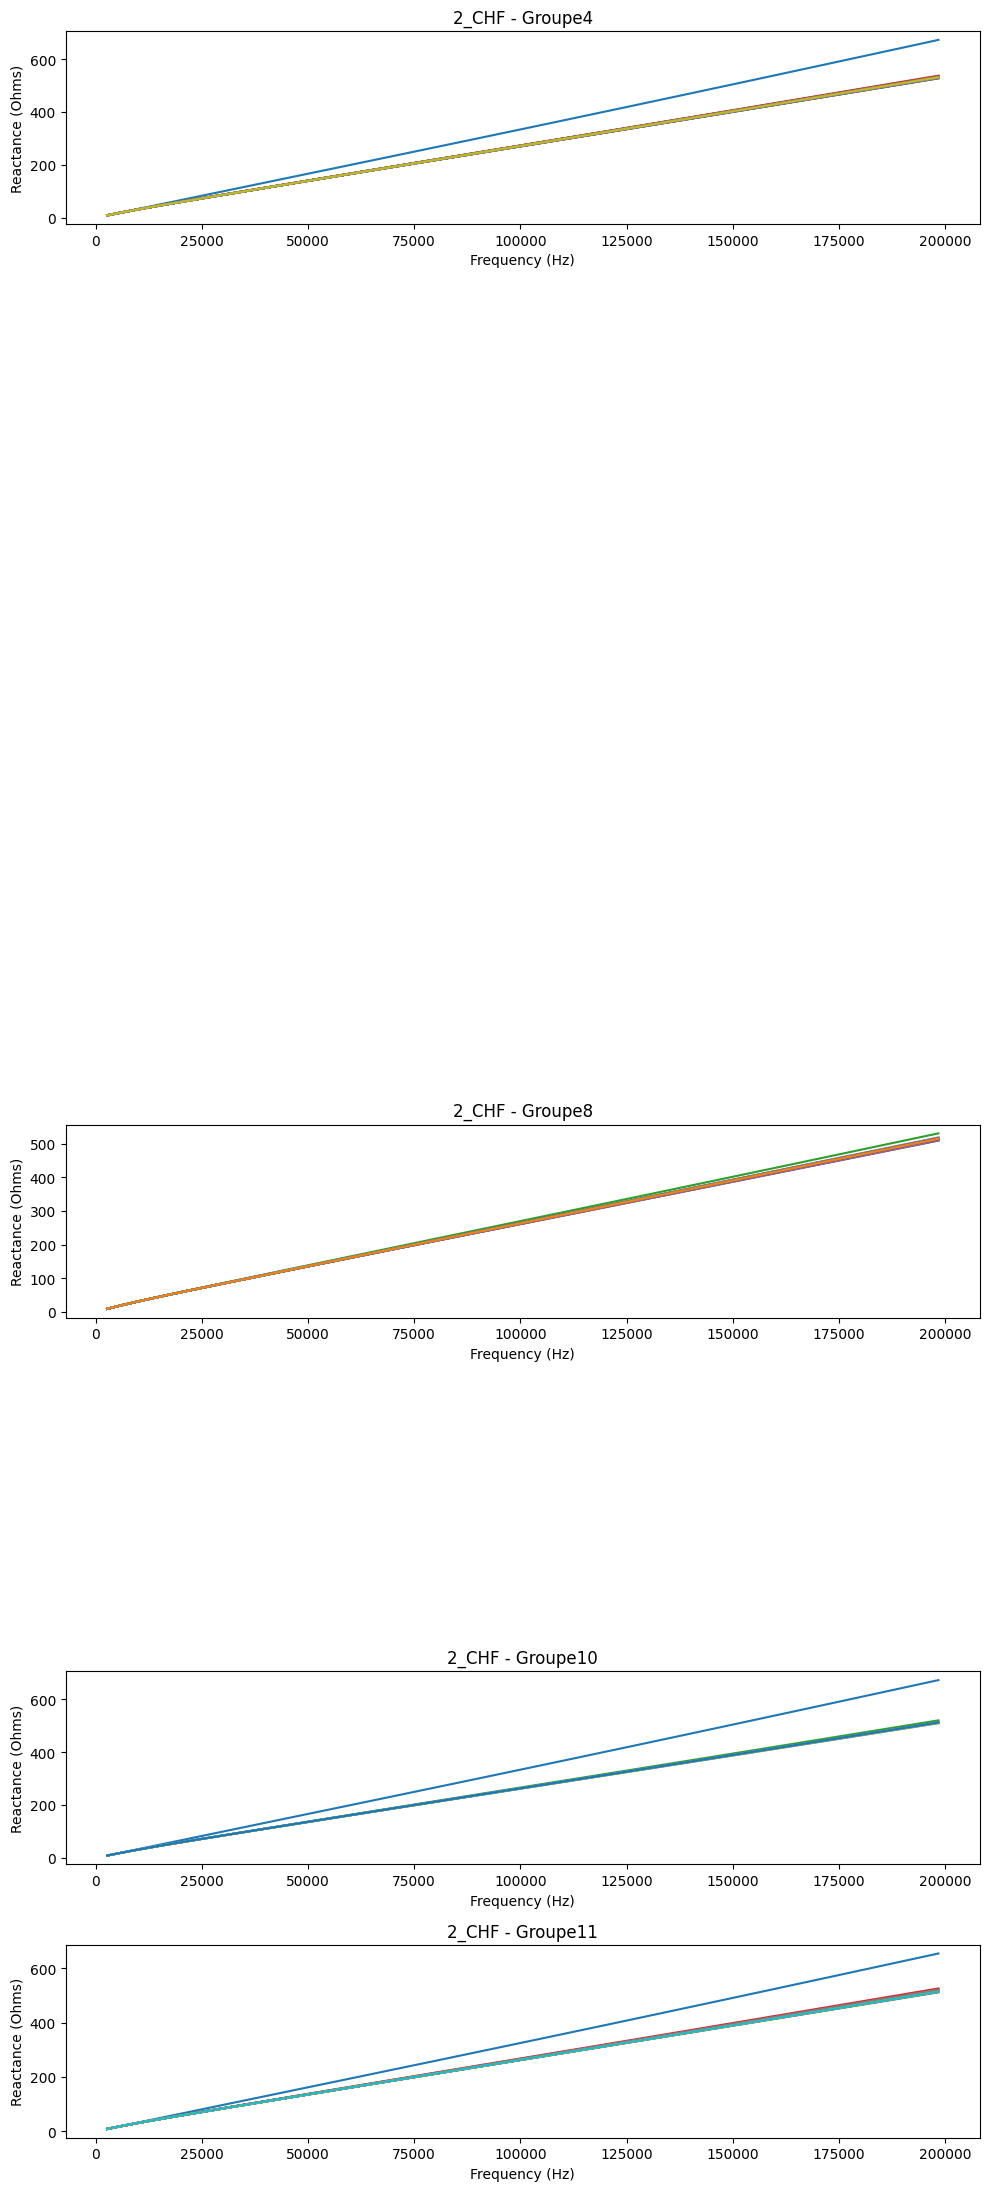

File not found: ./data\Groupe1\5_CHF.h5
File not found: ./data\Groupe2\5_CHF.h5
File not found: ./data\Groupe3\5_CHF.h5
File not found: ./data\Groupe5\5_CHF.h5
File not found: ./data\Groupe6\5_CHF.h5
File not found: ./data\Groupe7\5_CHF.h5
File not found: ./data\Groupe9\5_CHF.h5


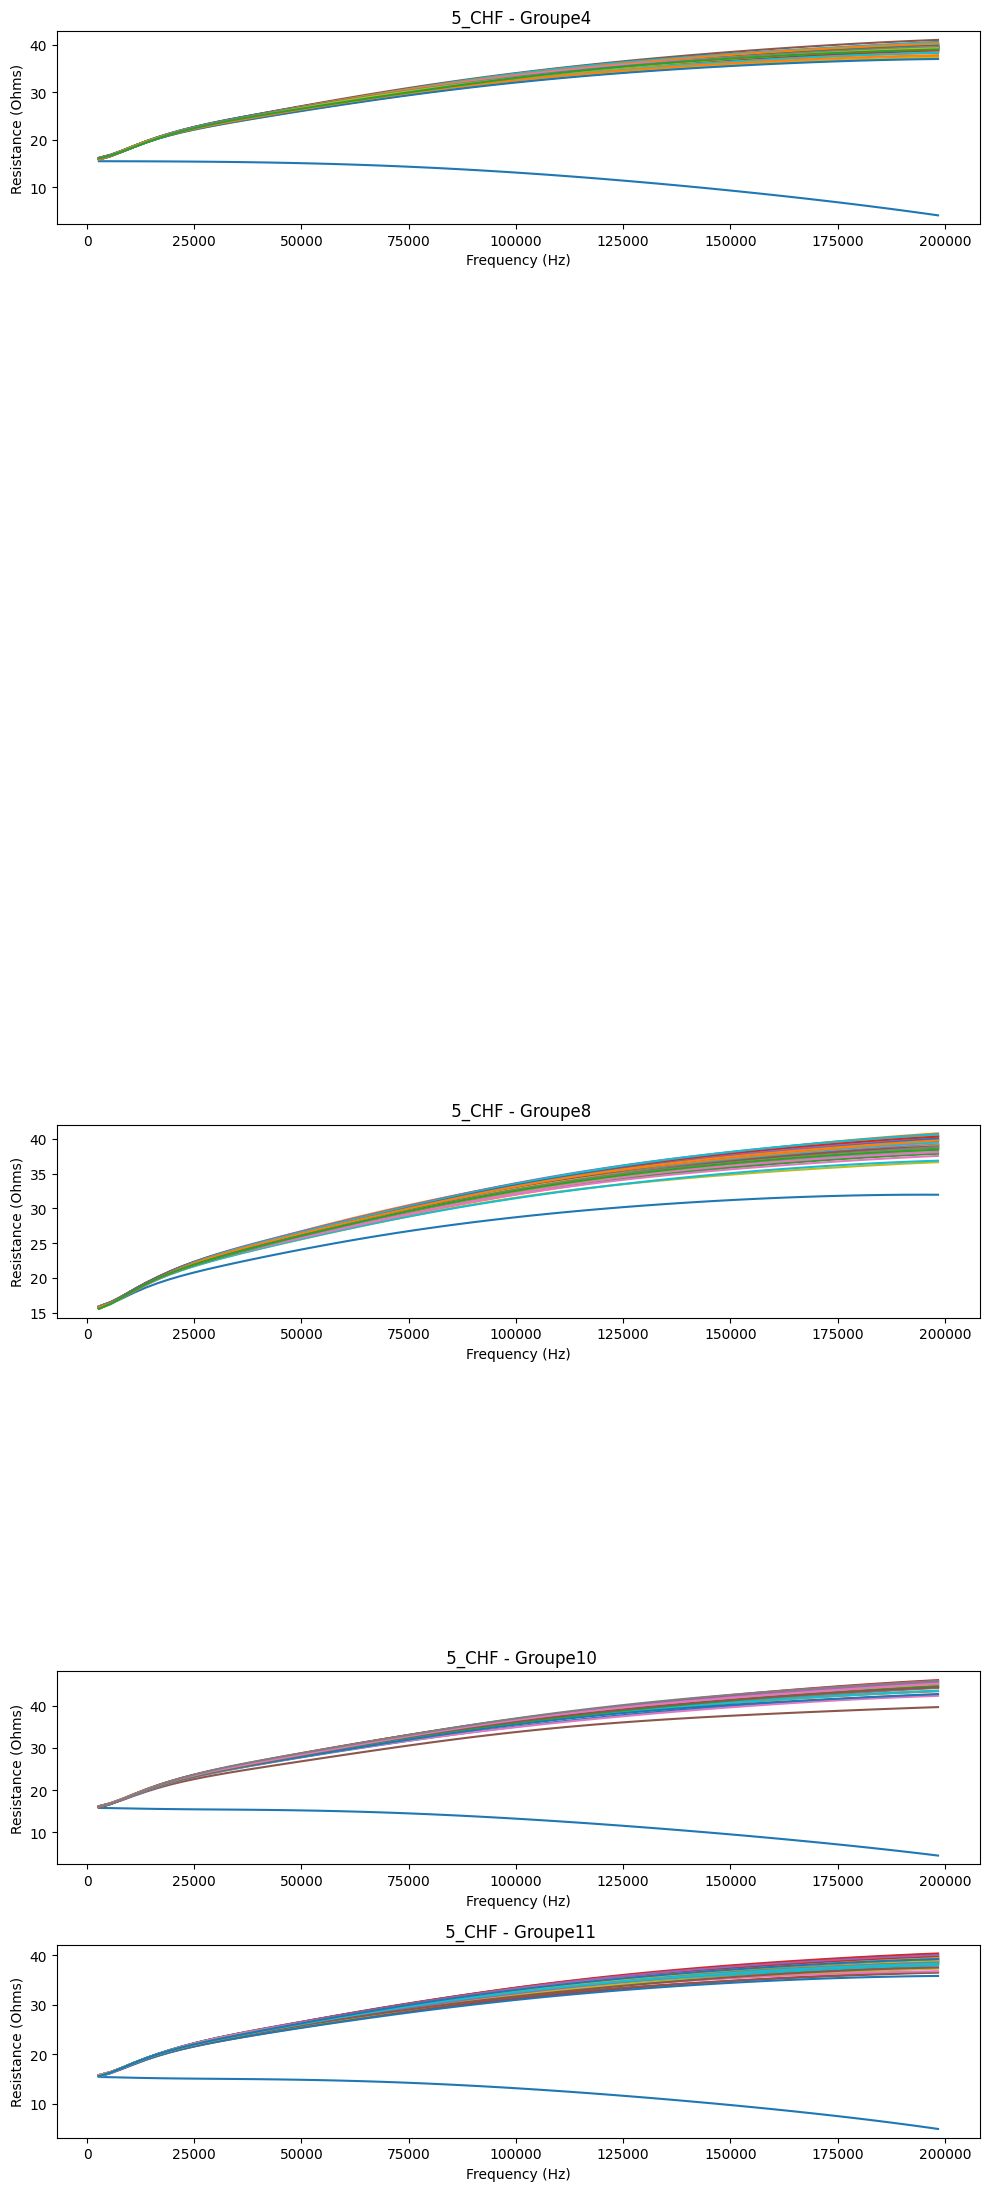

File not found: ./data\Groupe1\5_CHF.h5
File not found: ./data\Groupe2\5_CHF.h5
File not found: ./data\Groupe3\5_CHF.h5
File not found: ./data\Groupe5\5_CHF.h5
File not found: ./data\Groupe6\5_CHF.h5
File not found: ./data\Groupe7\5_CHF.h5
File not found: ./data\Groupe9\5_CHF.h5


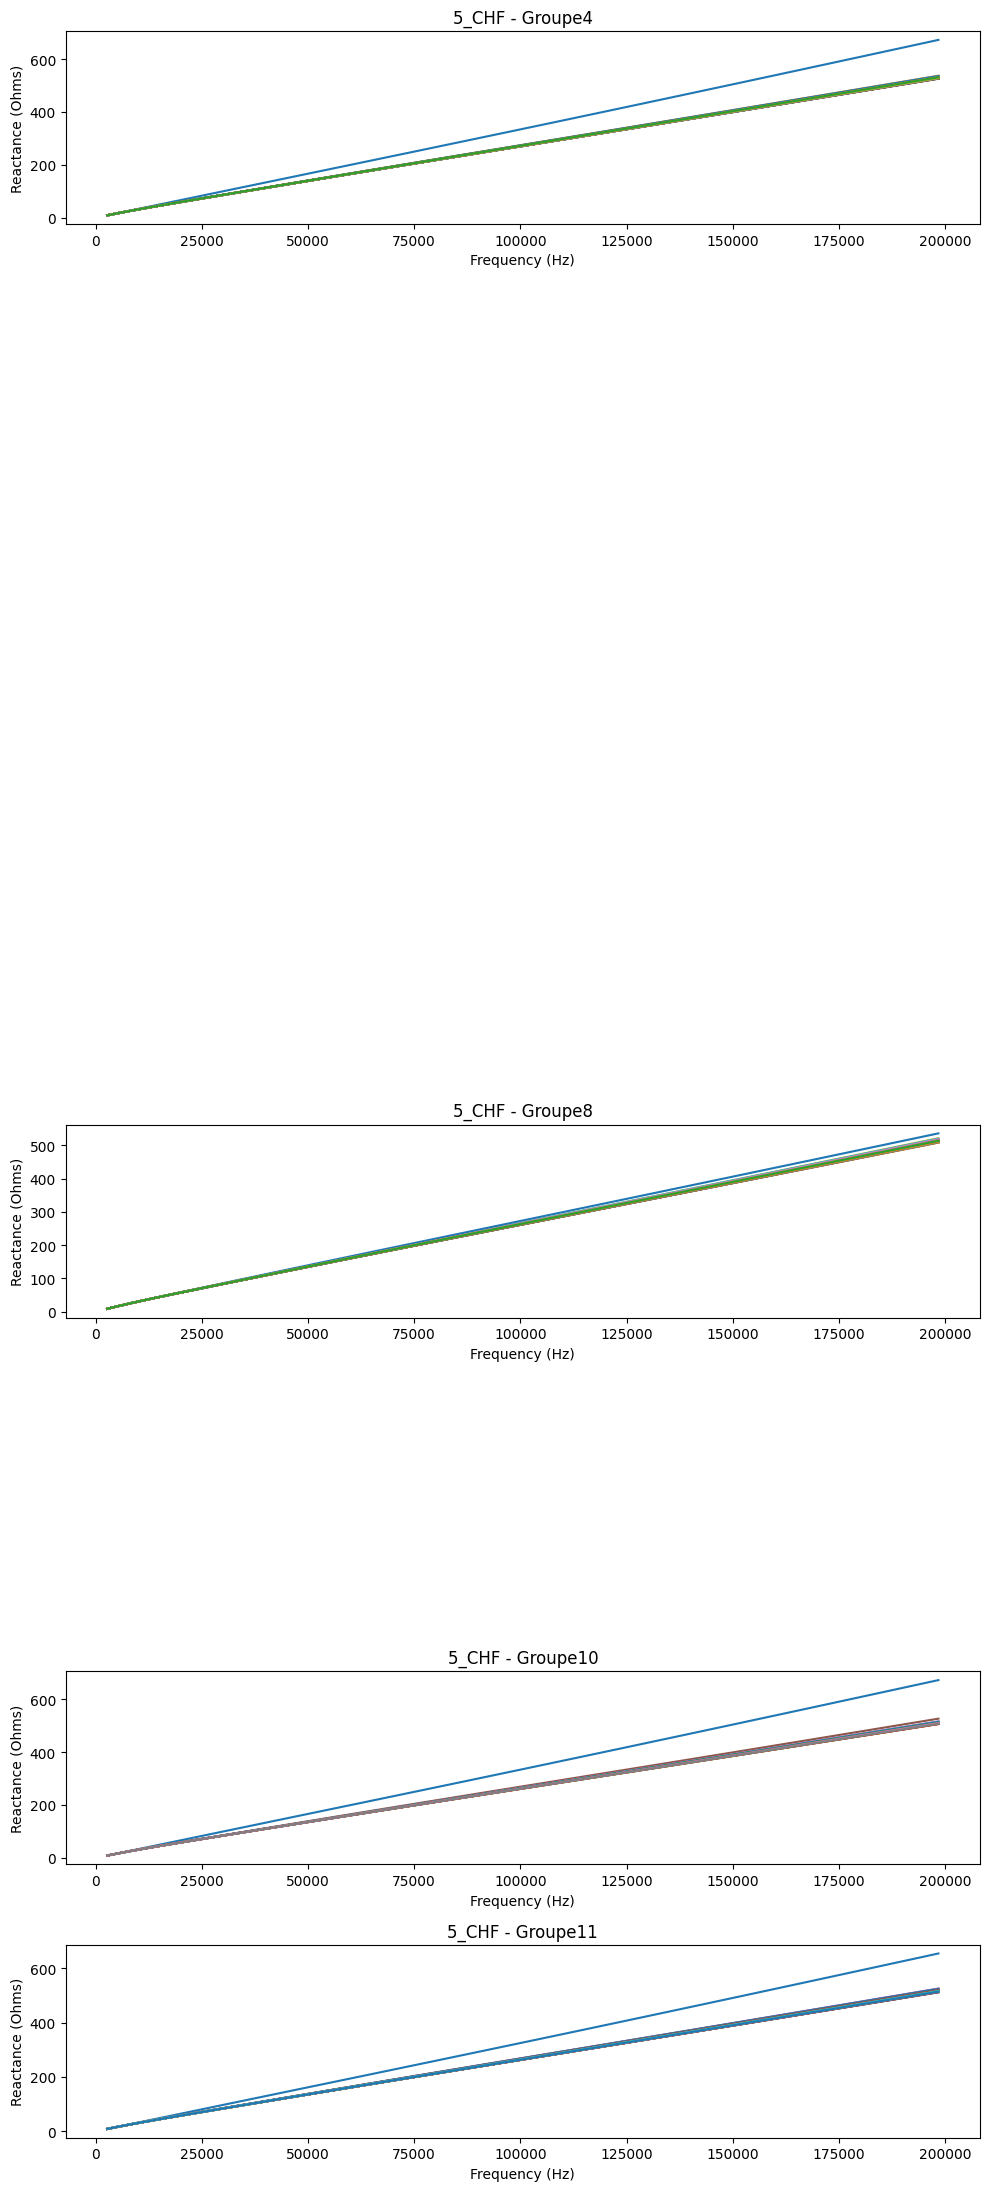

File not found: ./data\Groupe1\5_CTS.h5
File not found: ./data\Groupe2\5_CTS.h5
File not found: ./data\Groupe3\5_CTS.h5
File not found: ./data\Groupe4\5_CTS.h5
File not found: ./data\Groupe5\5_CTS.h5
File not found: ./data\Groupe6\5_CTS.h5
File not found: ./data\Groupe7\5_CTS.h5
File not found: ./data\Groupe9\5_CTS.h5


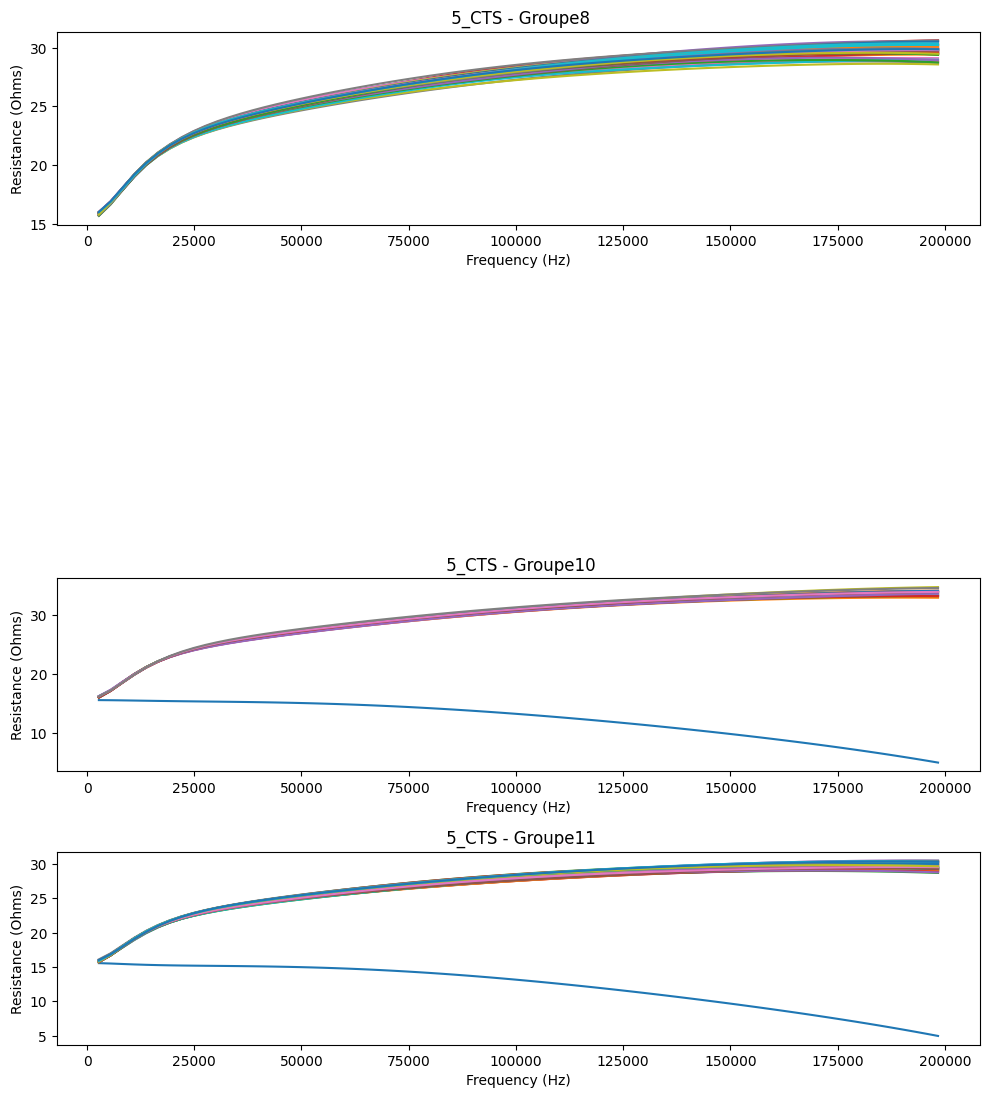

File not found: ./data\Groupe1\5_CTS.h5
File not found: ./data\Groupe2\5_CTS.h5
File not found: ./data\Groupe3\5_CTS.h5
File not found: ./data\Groupe4\5_CTS.h5
File not found: ./data\Groupe5\5_CTS.h5
File not found: ./data\Groupe6\5_CTS.h5
File not found: ./data\Groupe7\5_CTS.h5
File not found: ./data\Groupe9\5_CTS.h5


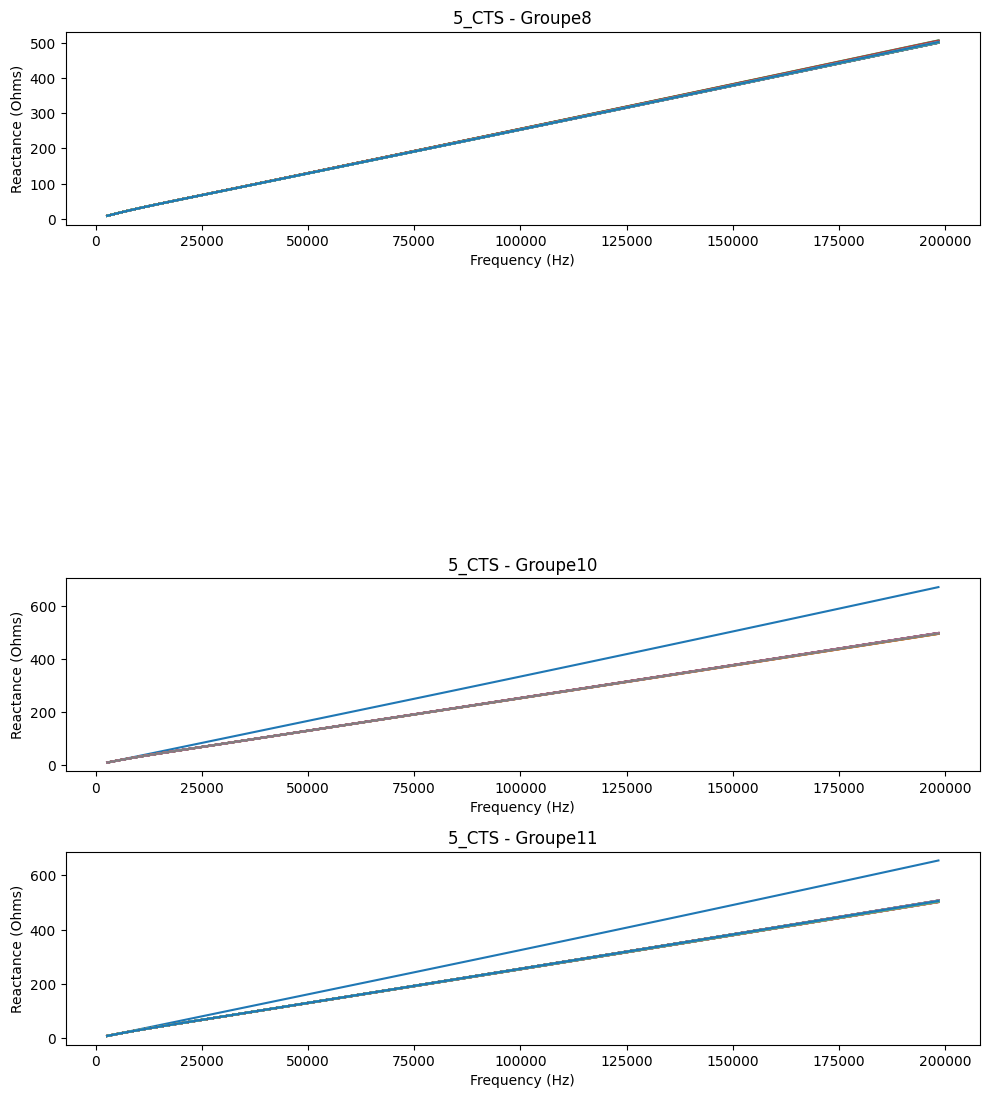

File not found: ./data\Groupe1\10_CTS.h5
File not found: ./data\Groupe2\10_CTS.h5
File not found: ./data\Groupe3\10_CTS.h5
File not found: ./data\Groupe5\10_CTS.h5
File not found: ./data\Groupe6\10_CTS.h5
File not found: ./data\Groupe7\10_CTS.h5
File not found: ./data\Groupe9\10_CTS.h5


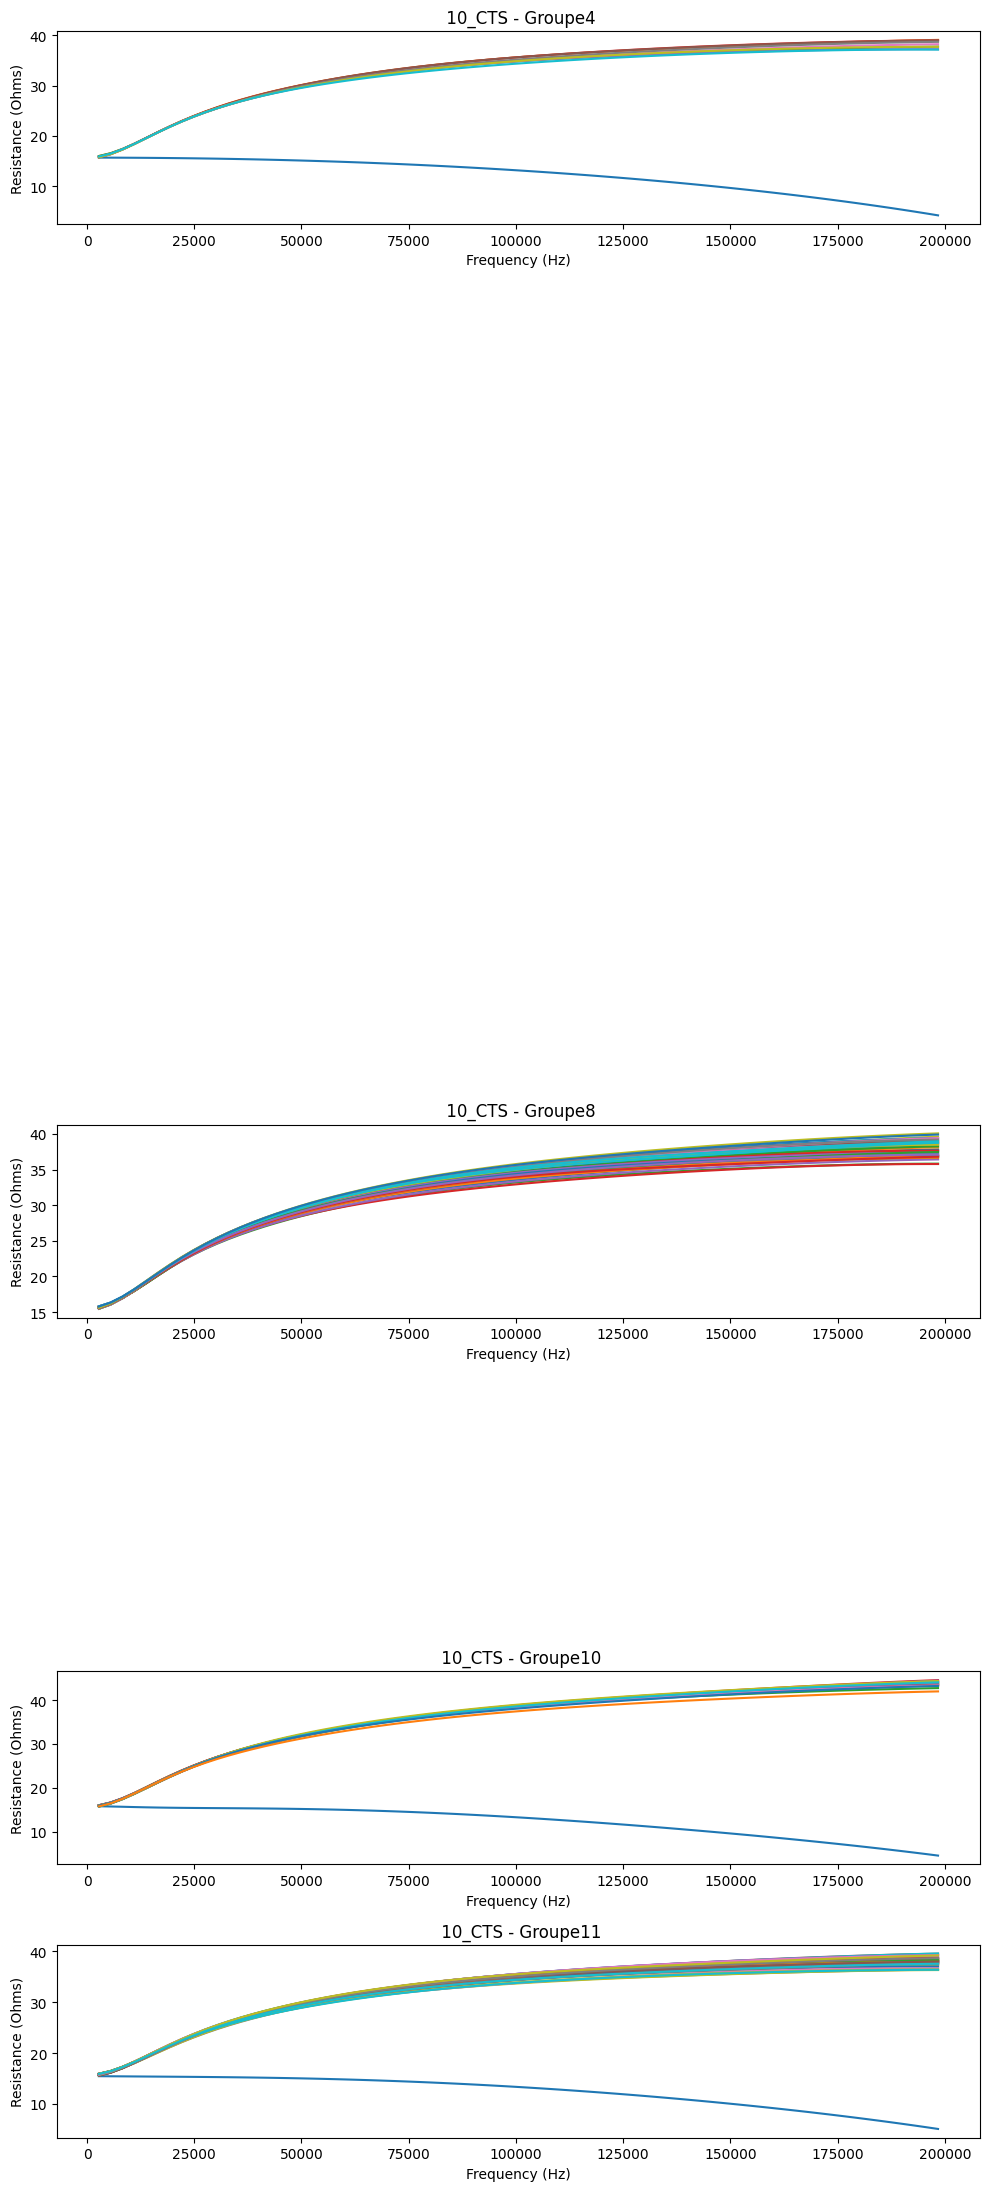

File not found: ./data\Groupe1\10_CTS.h5
File not found: ./data\Groupe2\10_CTS.h5
File not found: ./data\Groupe3\10_CTS.h5
File not found: ./data\Groupe5\10_CTS.h5
File not found: ./data\Groupe6\10_CTS.h5
File not found: ./data\Groupe7\10_CTS.h5
File not found: ./data\Groupe9\10_CTS.h5


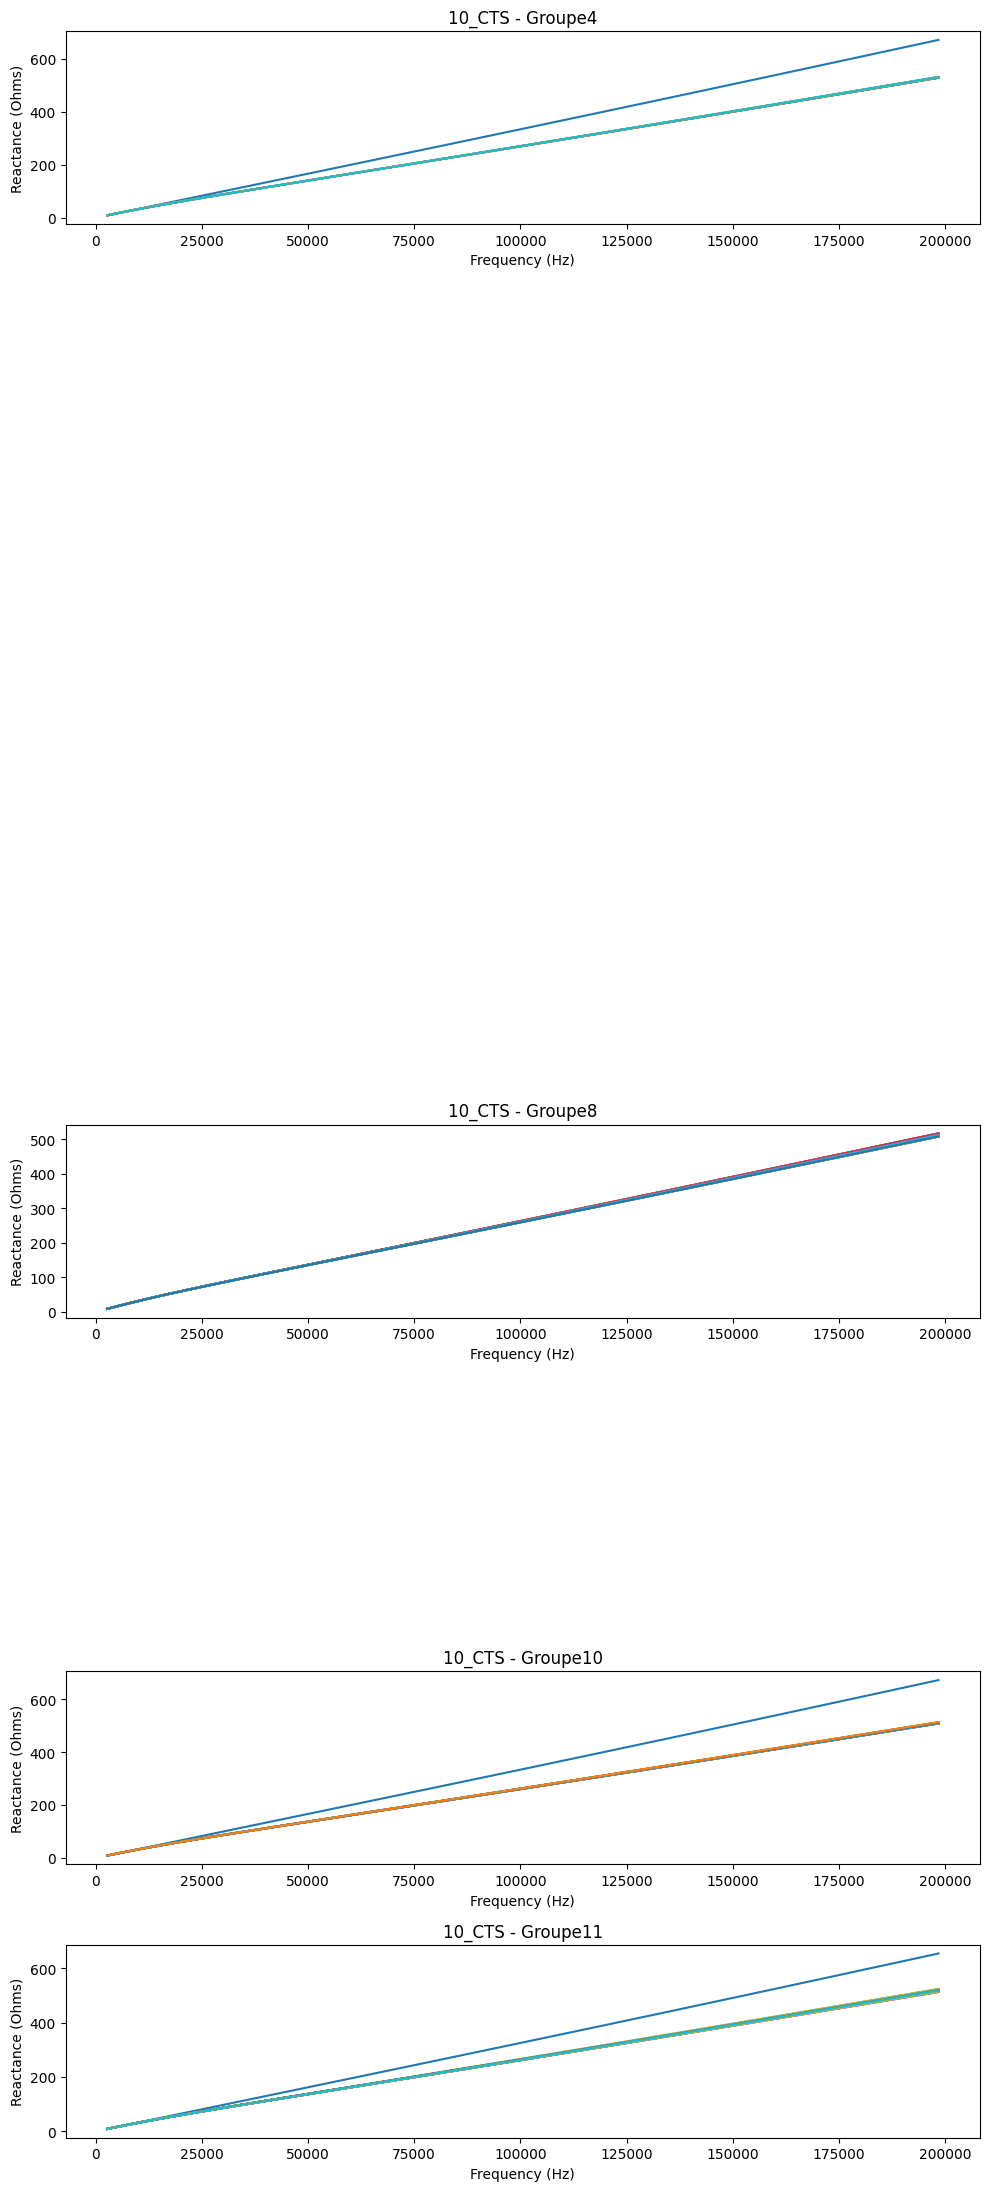

File not found: ./data\Groupe1\20_CTS.h5
File not found: ./data\Groupe2\20_CTS.h5
File not found: ./data\Groupe3\20_CTS.h5
File not found: ./data\Groupe5\20_CTS.h5
File not found: ./data\Groupe6\20_CTS.h5
File not found: ./data\Groupe7\20_CTS.h5
File not found: ./data\Groupe9\20_CTS.h5


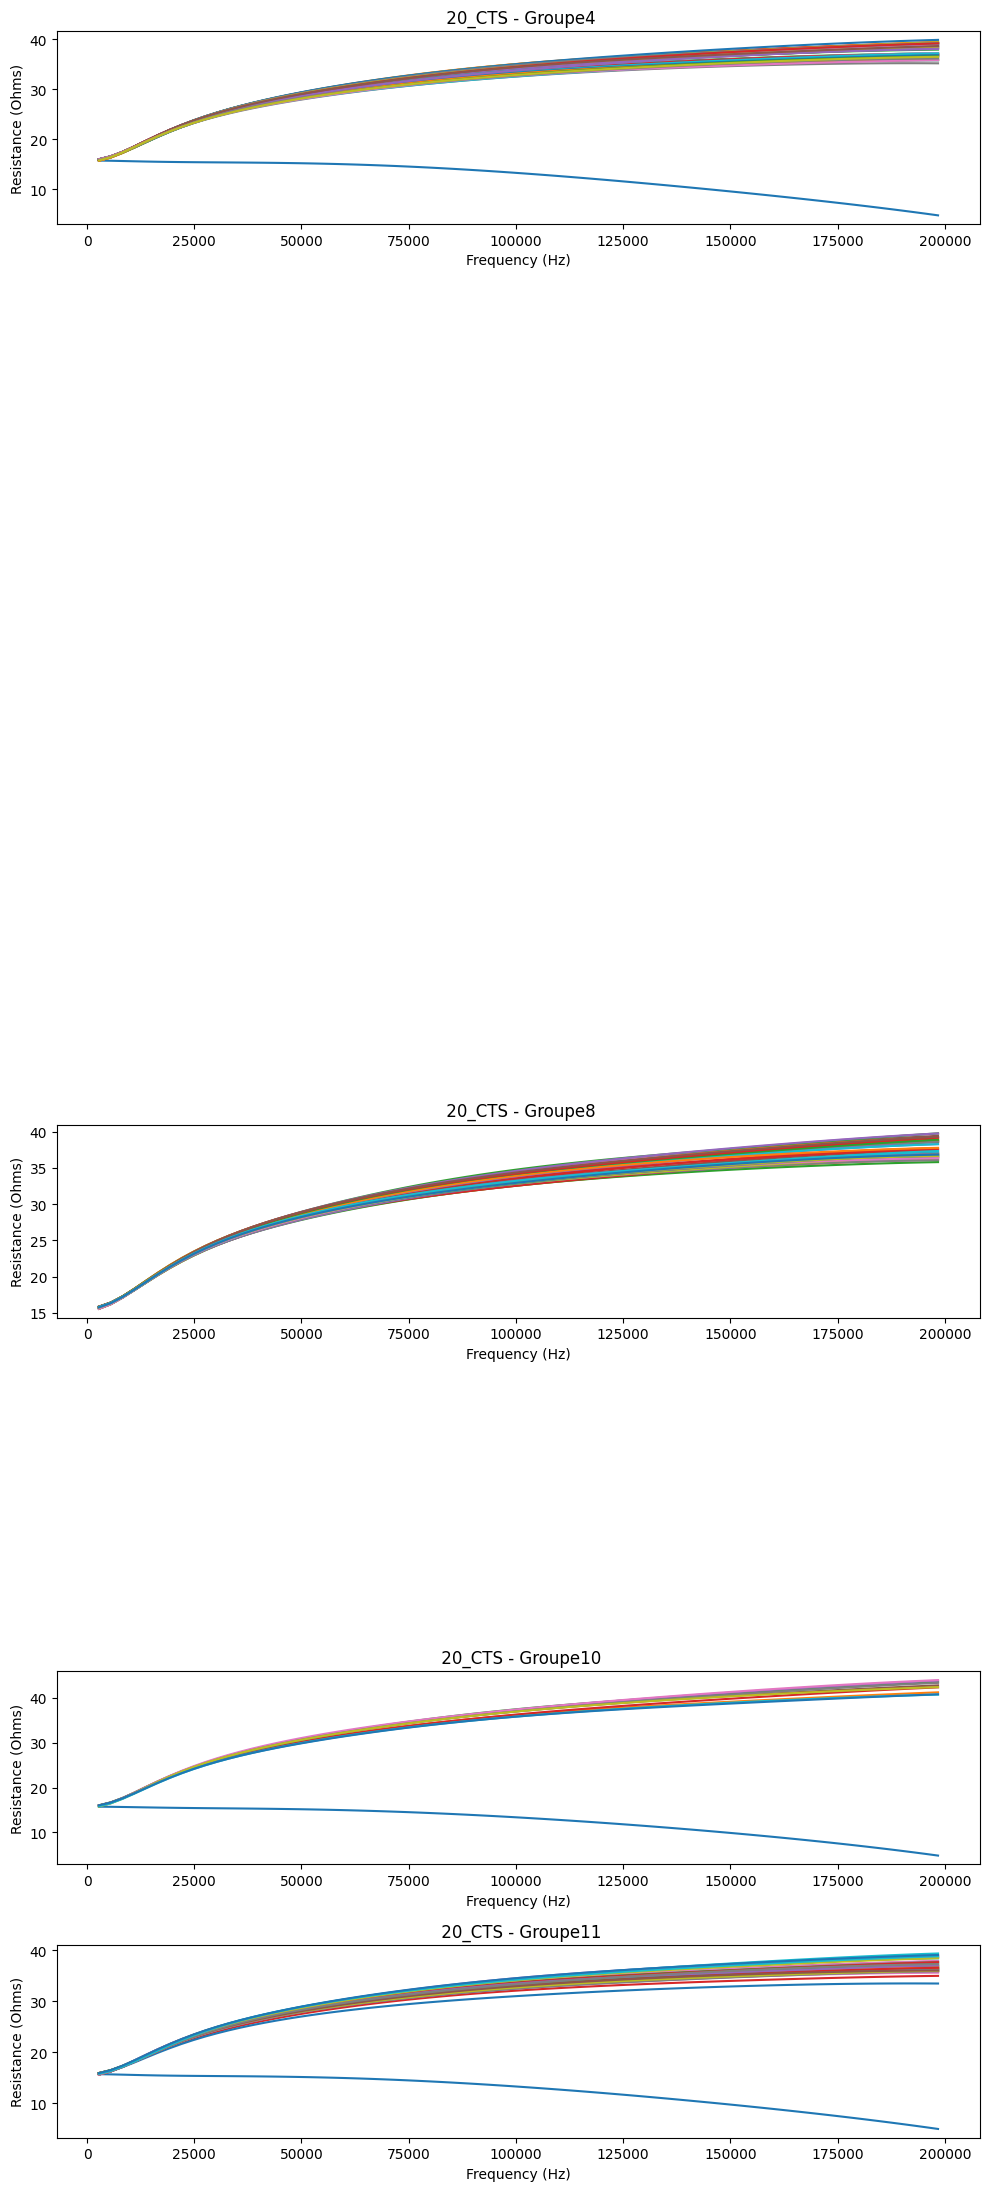

File not found: ./data\Groupe1\20_CTS.h5
File not found: ./data\Groupe2\20_CTS.h5
File not found: ./data\Groupe3\20_CTS.h5
File not found: ./data\Groupe5\20_CTS.h5
File not found: ./data\Groupe6\20_CTS.h5
File not found: ./data\Groupe7\20_CTS.h5
File not found: ./data\Groupe9\20_CTS.h5


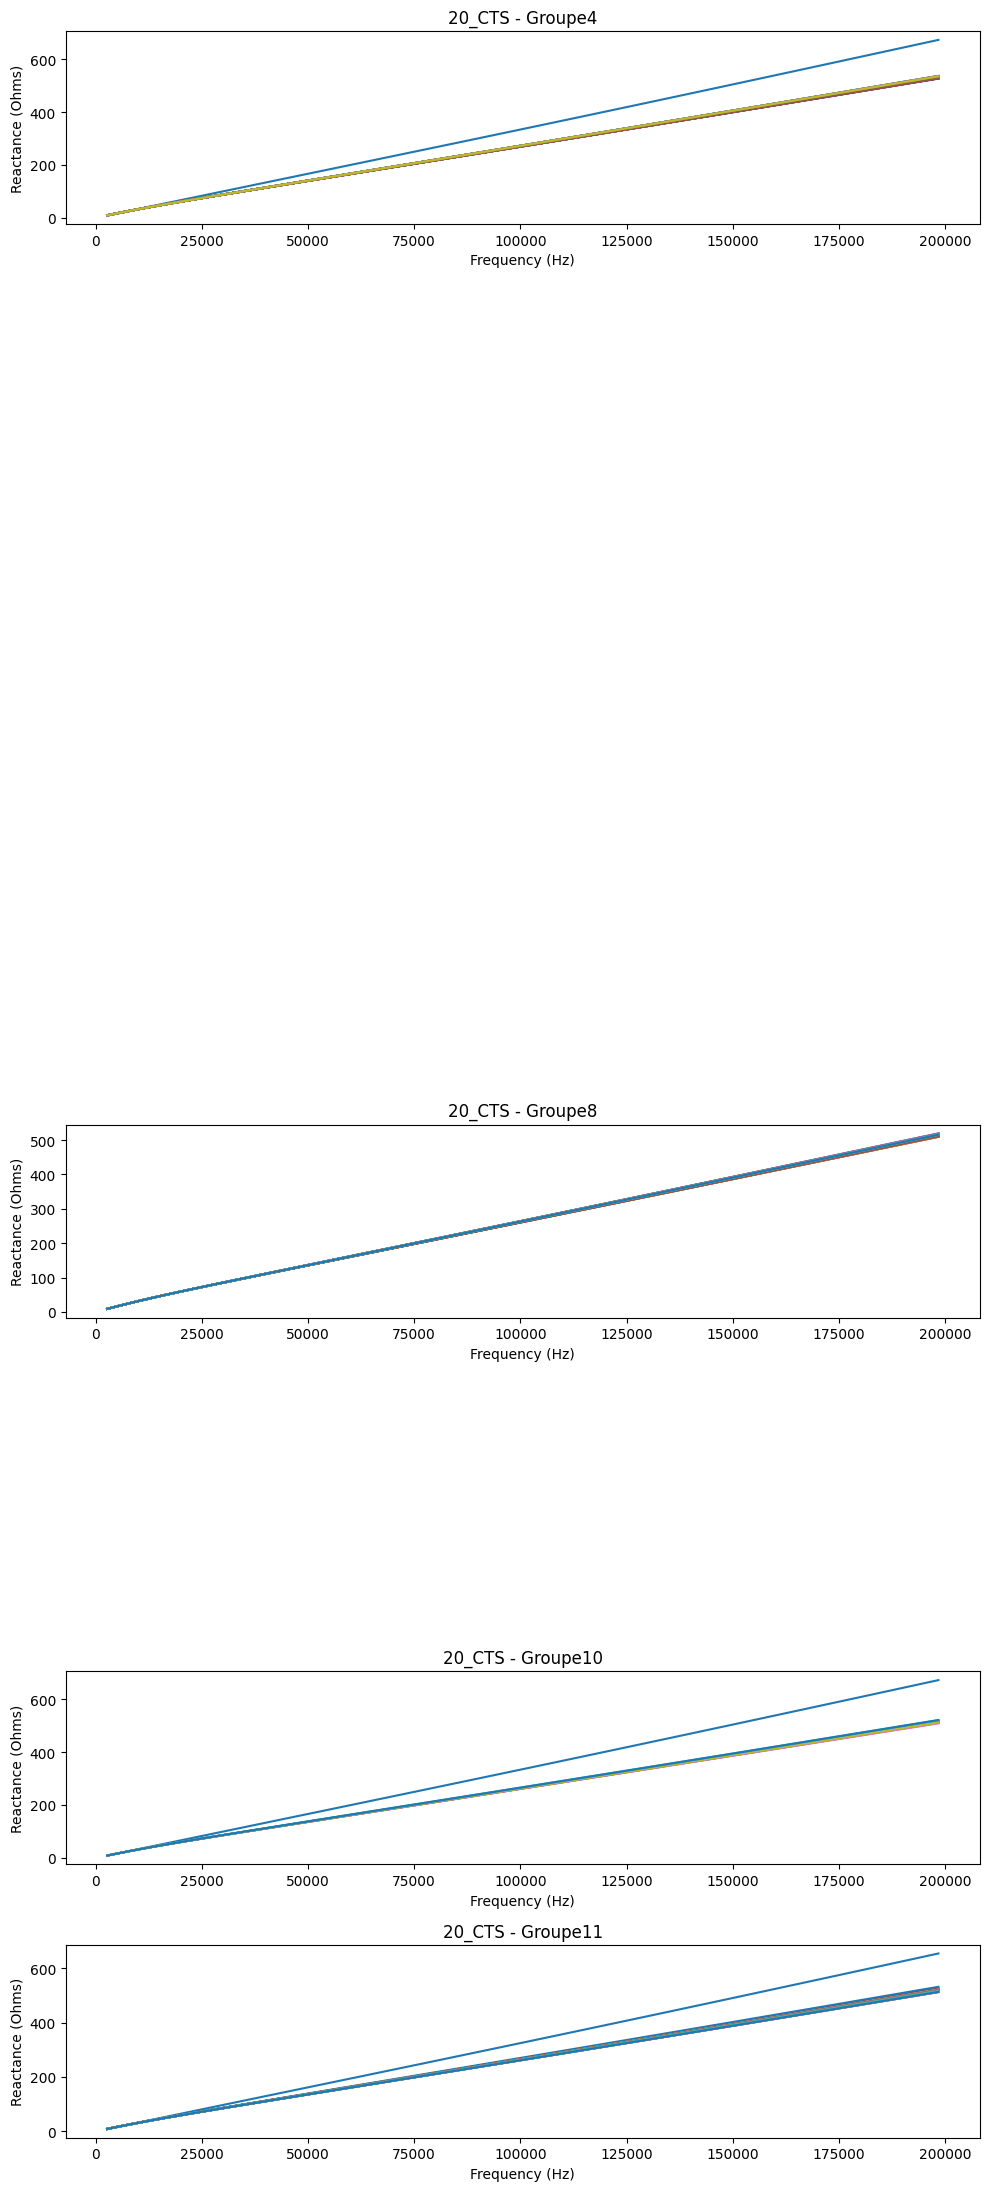

File not found: ./data\Groupe1\50_CTS.h5
File not found: ./data\Groupe2\50_CTS.h5
File not found: ./data\Groupe3\50_CTS.h5
File not found: ./data\Groupe4\50_CTS.h5
File not found: ./data\Groupe5\50_CTS.h5
File not found: ./data\Groupe6\50_CTS.h5
File not found: ./data\Groupe7\50_CTS.h5
File not found: ./data\Groupe9\50_CTS.h5


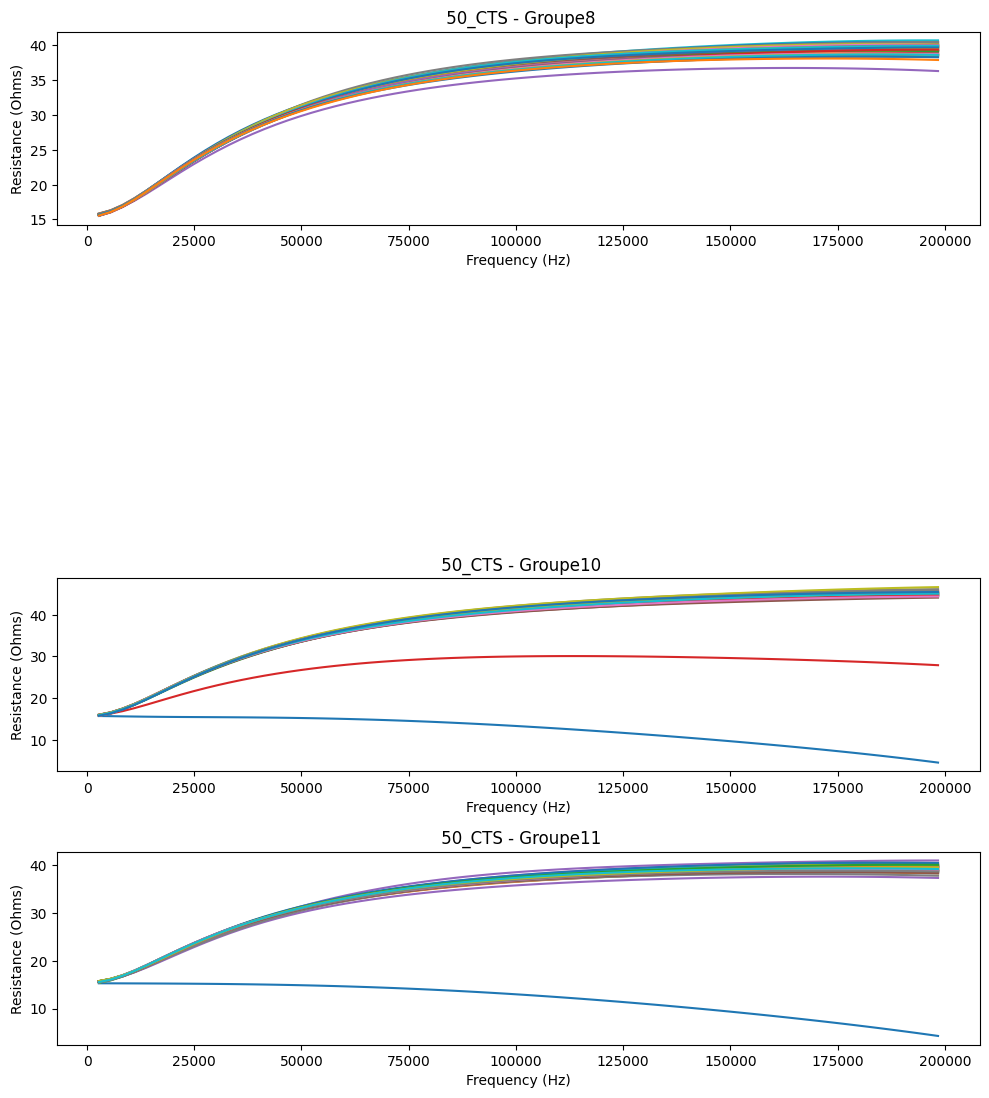

File not found: ./data\Groupe1\50_CTS.h5
File not found: ./data\Groupe2\50_CTS.h5
File not found: ./data\Groupe3\50_CTS.h5
File not found: ./data\Groupe4\50_CTS.h5
File not found: ./data\Groupe5\50_CTS.h5
File not found: ./data\Groupe6\50_CTS.h5
File not found: ./data\Groupe7\50_CTS.h5
File not found: ./data\Groupe9\50_CTS.h5


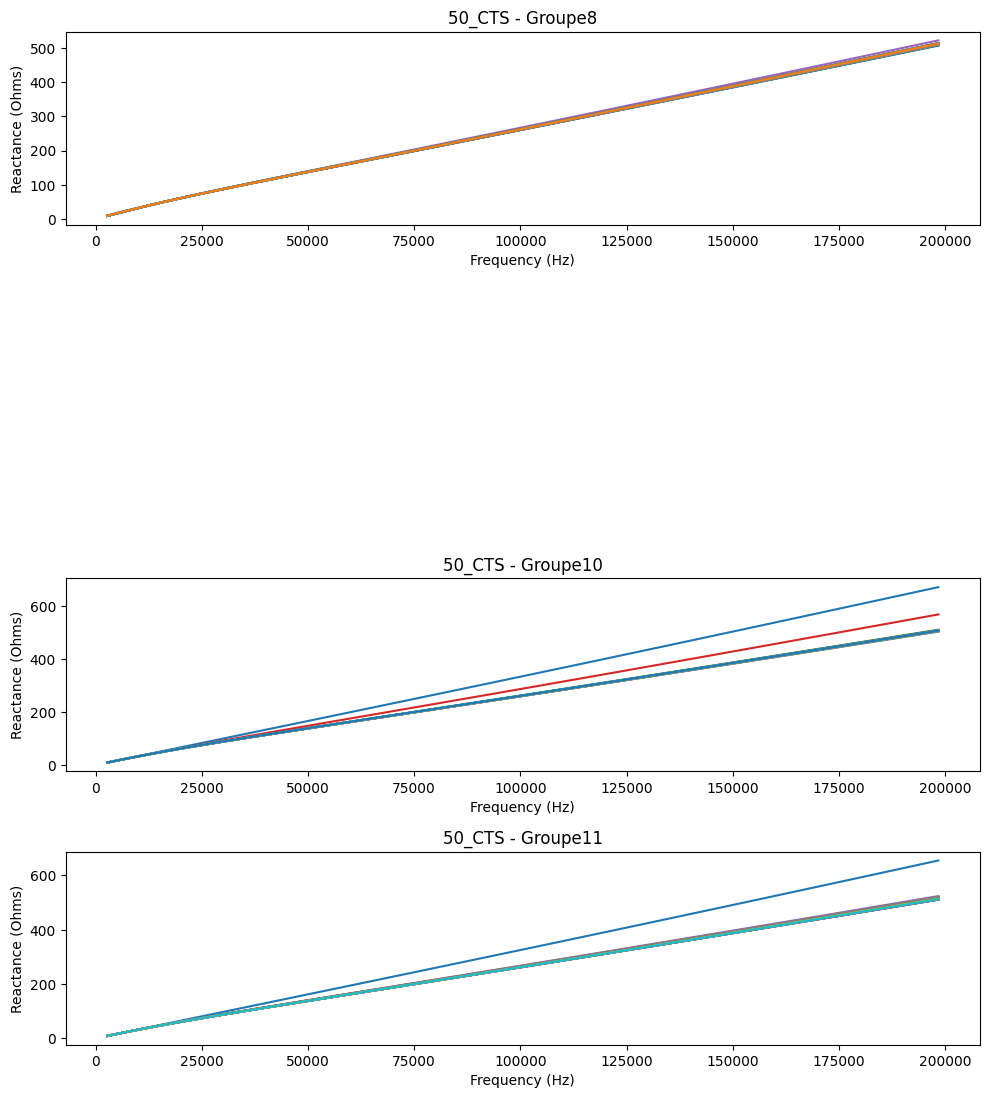

: 

In [79]:

# Update the directory path and the number of groups
data_dir = "./data"
num_groups = 11

# Define the list of coins
coins = [
    "1_CHF.h5", "2_CHF.h5", "5_CHF.h5", "5_CTS.h5","10_CTS.h5", "20_CTS.h5", "50_CTS.h5"
]

# Function to plot the resistance and reactance for a given coin across all groups
def plot_coin_across_groups(coin):

    coin_name = coin.replace('.h5', '')  # Remove .h5 from the coin name
    # Plot resistance
    plt.figure(figsize=(10, 30))
    for i in range(1, num_groups + 1):
        group = f"Groupe{i}"
        file_path = os.path.join(data_dir, group, coin)
        if os.path.isfile(file_path):
            reader = DataFileReader(file_path)
            frequency, Z = reader.get_all_mesurements()
            
            # Separate resistance
            resistance = np.real(Z)
            plt.subplot(num_groups, 1, i)
            for idx in range(resistance.shape[0]):
                plt.plot(frequency, resistance[idx])
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Resistance (Ohms)')
            plt.title(f' {coin_name} - {group}')
            
        else:
            print(f"File not found: {file_path}")
    plt.tight_layout()
    plt.show()
    
    # Plot reactance
    plt.figure(figsize=(10, 30))
    for i in range(1, num_groups + 1):
        group = f"Groupe{i}"
        file_path = os.path.join(data_dir, group, coin)
        if os.path.isfile(file_path):
            reader = DataFileReader(file_path)
            frequency, Z = reader.get_all_mesurements()
            
            # Separate reactance
            reactance = np.imag(Z)
            plt.subplot(num_groups, 1, i)
            for idx in range(reactance.shape[0]):
                plt.plot(frequency, reactance[idx])
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Reactance (Ohms)')
            plt.title(f'{coin_name} - {group}')
            
        else:
            print(f"File not found: {file_path}")
    plt.tight_layout()
    plt.show()

# Plot the data for each coin across all groups
for coin in coins:
    plot_coin_across_groups(coin)



In [65]:
# Update the directory path and the number of groups
data_dir = "./data"
num_groups = 11

# Define the list of coins
coins = [
    "1_CHF.h5", "2_CHF.h5", "5_CHF.h5", "10_CTS.h5", "20_CTS.h5", "50_CTS.h5", "EUR_1.h5"
]

# Function to plot the data for a given group and coin
def plot_group_coin_data(group, coin):
    file_path = os.path.join(data_dir, group, coin)
    if os.path.isfile(file_path):
        reader = DataFileReader(file_path)
        print(reader.get_info())
        frequency, Z = reader.get_all_mesurements()
        plt.figure(figsize=(10, 6))
        for idx, z in enumerate(Z):
            plt.plot(frequency, np.abs(z)) #plt.plot(frequency, np.abs(z), label=f'Measurement {idx+1}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Impedance (Ohms)')
        plt.title(f'Impedance Measurements for {coin} - {group}')
        plt.legend()
        plt.show()
    else:
        print(f"File not found: {file_path}")

# Plot the data for each group and coin
for i in range(1, num_groups + 1):
    group = f"Groupe{i}"
    group_path = os.path.join(data_dir, group)
    if os.path.isdir(group_path):
        for coin in coins:
            plot_group_coin_data(group, coin)
    else:
        print(f"Group directory not found: {group_path}")

Group directory not found: ./data\Groupe1
File not found: ./data\Groupe2\1_CHF.h5
File not found: ./data\Groupe2\2_CHF.h5
File not found: ./data\Groupe2\5_CHF.h5
File not found: ./data\Groupe2\10_CTS.h5
File not found: ./data\Groupe2\20_CTS.h5
File not found: ./data\Groupe2\50_CTS.h5
File not found: ./data\Groupe2\EUR_1.h5
Group directory not found: ./data\Groupe3


AttributeError: 'DataFileReader' object has no attribute 'get_info'

## Step 2: Analyzing and Filtering Anomalies

In this step, we will analyze the plotted data to identify any anomalies and filter out the data if necessary.


In [ ]:
# Collect all valid measurements
all_frequency = []
all_impedance = []

for i in range(1, num_groups + 1):
    group = f"Groupe{i}"
    group_path = os.path.join(data_dir, group)
    if os.path.isdir(group_path):
        for coin in coins:
            file_path = os.path.join(group_path, coin)
            if os.path.isfile(file_path):
                reader = DataFileReader(file_path)
                frequency, Z = reader.get_all_mesurements()
                if not is_anomalous(frequency, Z):
                    all_frequency.append(frequency)
                    all_impedance.append(Z)
                else:
                    print(f"Anomalous data detected in {coin} - {group}")
    else:
        print(f"Group directory not found: {group_path}")

print("Data collection complete.")



Group directory not found: ./data\Groupe1
Group directory not found: ./data\Groupe3


NameError: name 'is_anomalous' is not defined

## Step 3: Merging Data

In this step, we will merge the data from all valid measurements to create a larger dataset.


In [ ]:
# Merging all collected data
merged_frequency = np.concatenate(all_frequency)
merged_impedance = np.concatenate(all_impedance)

print("Merged Data Shape:", merged_frequency.shape, merged_impedance.shape)


NameError: name 'np' is not defined

## Step 4: Plotting Merged Data

Finally, we will plot the merged data to visualize the overall dataset.


In [ ]:
plt.figure(figsize=(10, 6))
for idx, z in enumerate(merged_impedance):
    plt.plot(merged_frequency, np.abs(z), label=f'Measurement {idx+1}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance (Ohms)')
plt.title('Merged Impedance Measurements')
plt.legend()
plt.show()
